In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# PART A

**DOMAIN**: Electronics and Telecommunication

**CONTEXT**: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.
 
**DATA DESCRIPTION**: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

**PROJECT OBJECTIVE:**  To build a classifier which can use the given parameters to determine the signal strength or quality.

In [ ]:
# importing required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, LeakyReLU

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.2'

**DATA IMPORT AND UNDERSTANDING ** 

1.A

In [ ]:
dataset=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ANN Project/NN Project Data - Signal.csv")

In [ ]:
dataset.head(6)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Shape of dataset
dataset.shape

(1599, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dataset.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

1.B

In [63]:
# checking for missing values

dataset.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

# Conclusion: 
1. No null values are present 

In [65]:
missing_values=dataset.isnull().sum()/len(dataset)
missing_df= pd.DataFrame({'columns':dataset.columns,
                         'percentage_missing':missing_values
                         })
missing_df

,columns,percentage_missing
Parameter 1,Parameter 1,0.0
Parameter 2,Parameter 2,0.0
Parameter 3,Parameter 3,0.0
Parameter 4,Parameter 4,0.0
Parameter 5,Parameter 5,0.0
Parameter 6,Parameter 6,0.0
Parameter 7,Parameter 7,0.0
Parameter 8,Parameter 8,0.0
Parameter 9,Parameter 9,0.0
Parameter 10,Parameter 10,0.0


1.C

In [ ]:
# checking for duplicates

dataset[dataset.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
# we will drop duplicates keeing first as non duplicate
dataset.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
# Data shape after removing duplicates
dataset.shape

(1359, 12)

1.D

In [ ]:
# visualisation of target variable
dataset['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


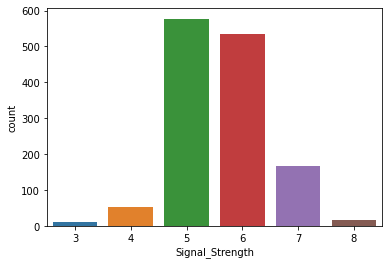

In [ ]:
sns.countplot(dataset['Signal_Strength'])

In [ ]:
dataset.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
Parameter 2,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
Parameter 3,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
Parameter 4,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
Parameter 5,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
Parameter 6,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
Parameter 7,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
Parameter 8,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
Parameter 9,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
Parameter 10,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


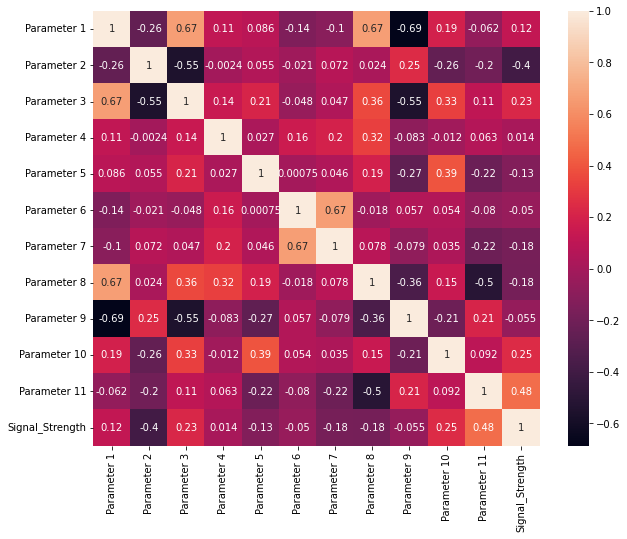

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

# 1.E:

# Insights:

1. Signal strength varies from 3 to 8.

2. Signal strength 5 has highest count value.

3. There are no null values present in dataset.

4. All the columns data is positively skewed. 


In [ ]:
# We check for any zeros in the columns
columns=dataset.columns
for col in columns:
  print("Value_counts for ", col, "are: \n")
  print(dataset[col].value_counts(),'\n')

Value_counts for  Parameter 1 are: 

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: Parameter 1, Length: 96, dtype: int64 

Value_counts for  Parameter 2 are: 

0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: Parameter 2, Length: 143, dtype: int64 

Value_counts for  Parameter 3 are: 

0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: Parameter 3, Length: 80, dtype: int64 

Value_counts for  Parameter 4 are: 

2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: Parameter 4, Length: 91, dtype: int64 

Value_counts for  Parameter 5 are: 

0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


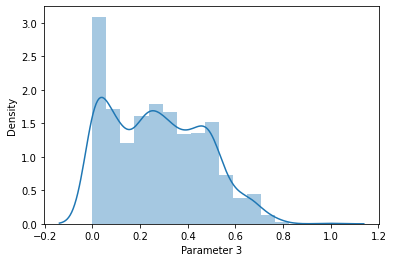

In [ ]:
sns.distplot(dataset['Parameter 3'])

### As evident parameter 3 has 118 zero values and it doesnot follow gaussian distribution. so we impute zeroes by our best method of median.

In [ ]:
dataset['Parameter 3'].replace(to_replace=0.00, value=dataset['Parameter 3'].median(), inplace=True)

In [ ]:
dataset['Parameter 3'].value_counts()

0.26    148
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: Parameter 3, Length: 79, dtype: int64

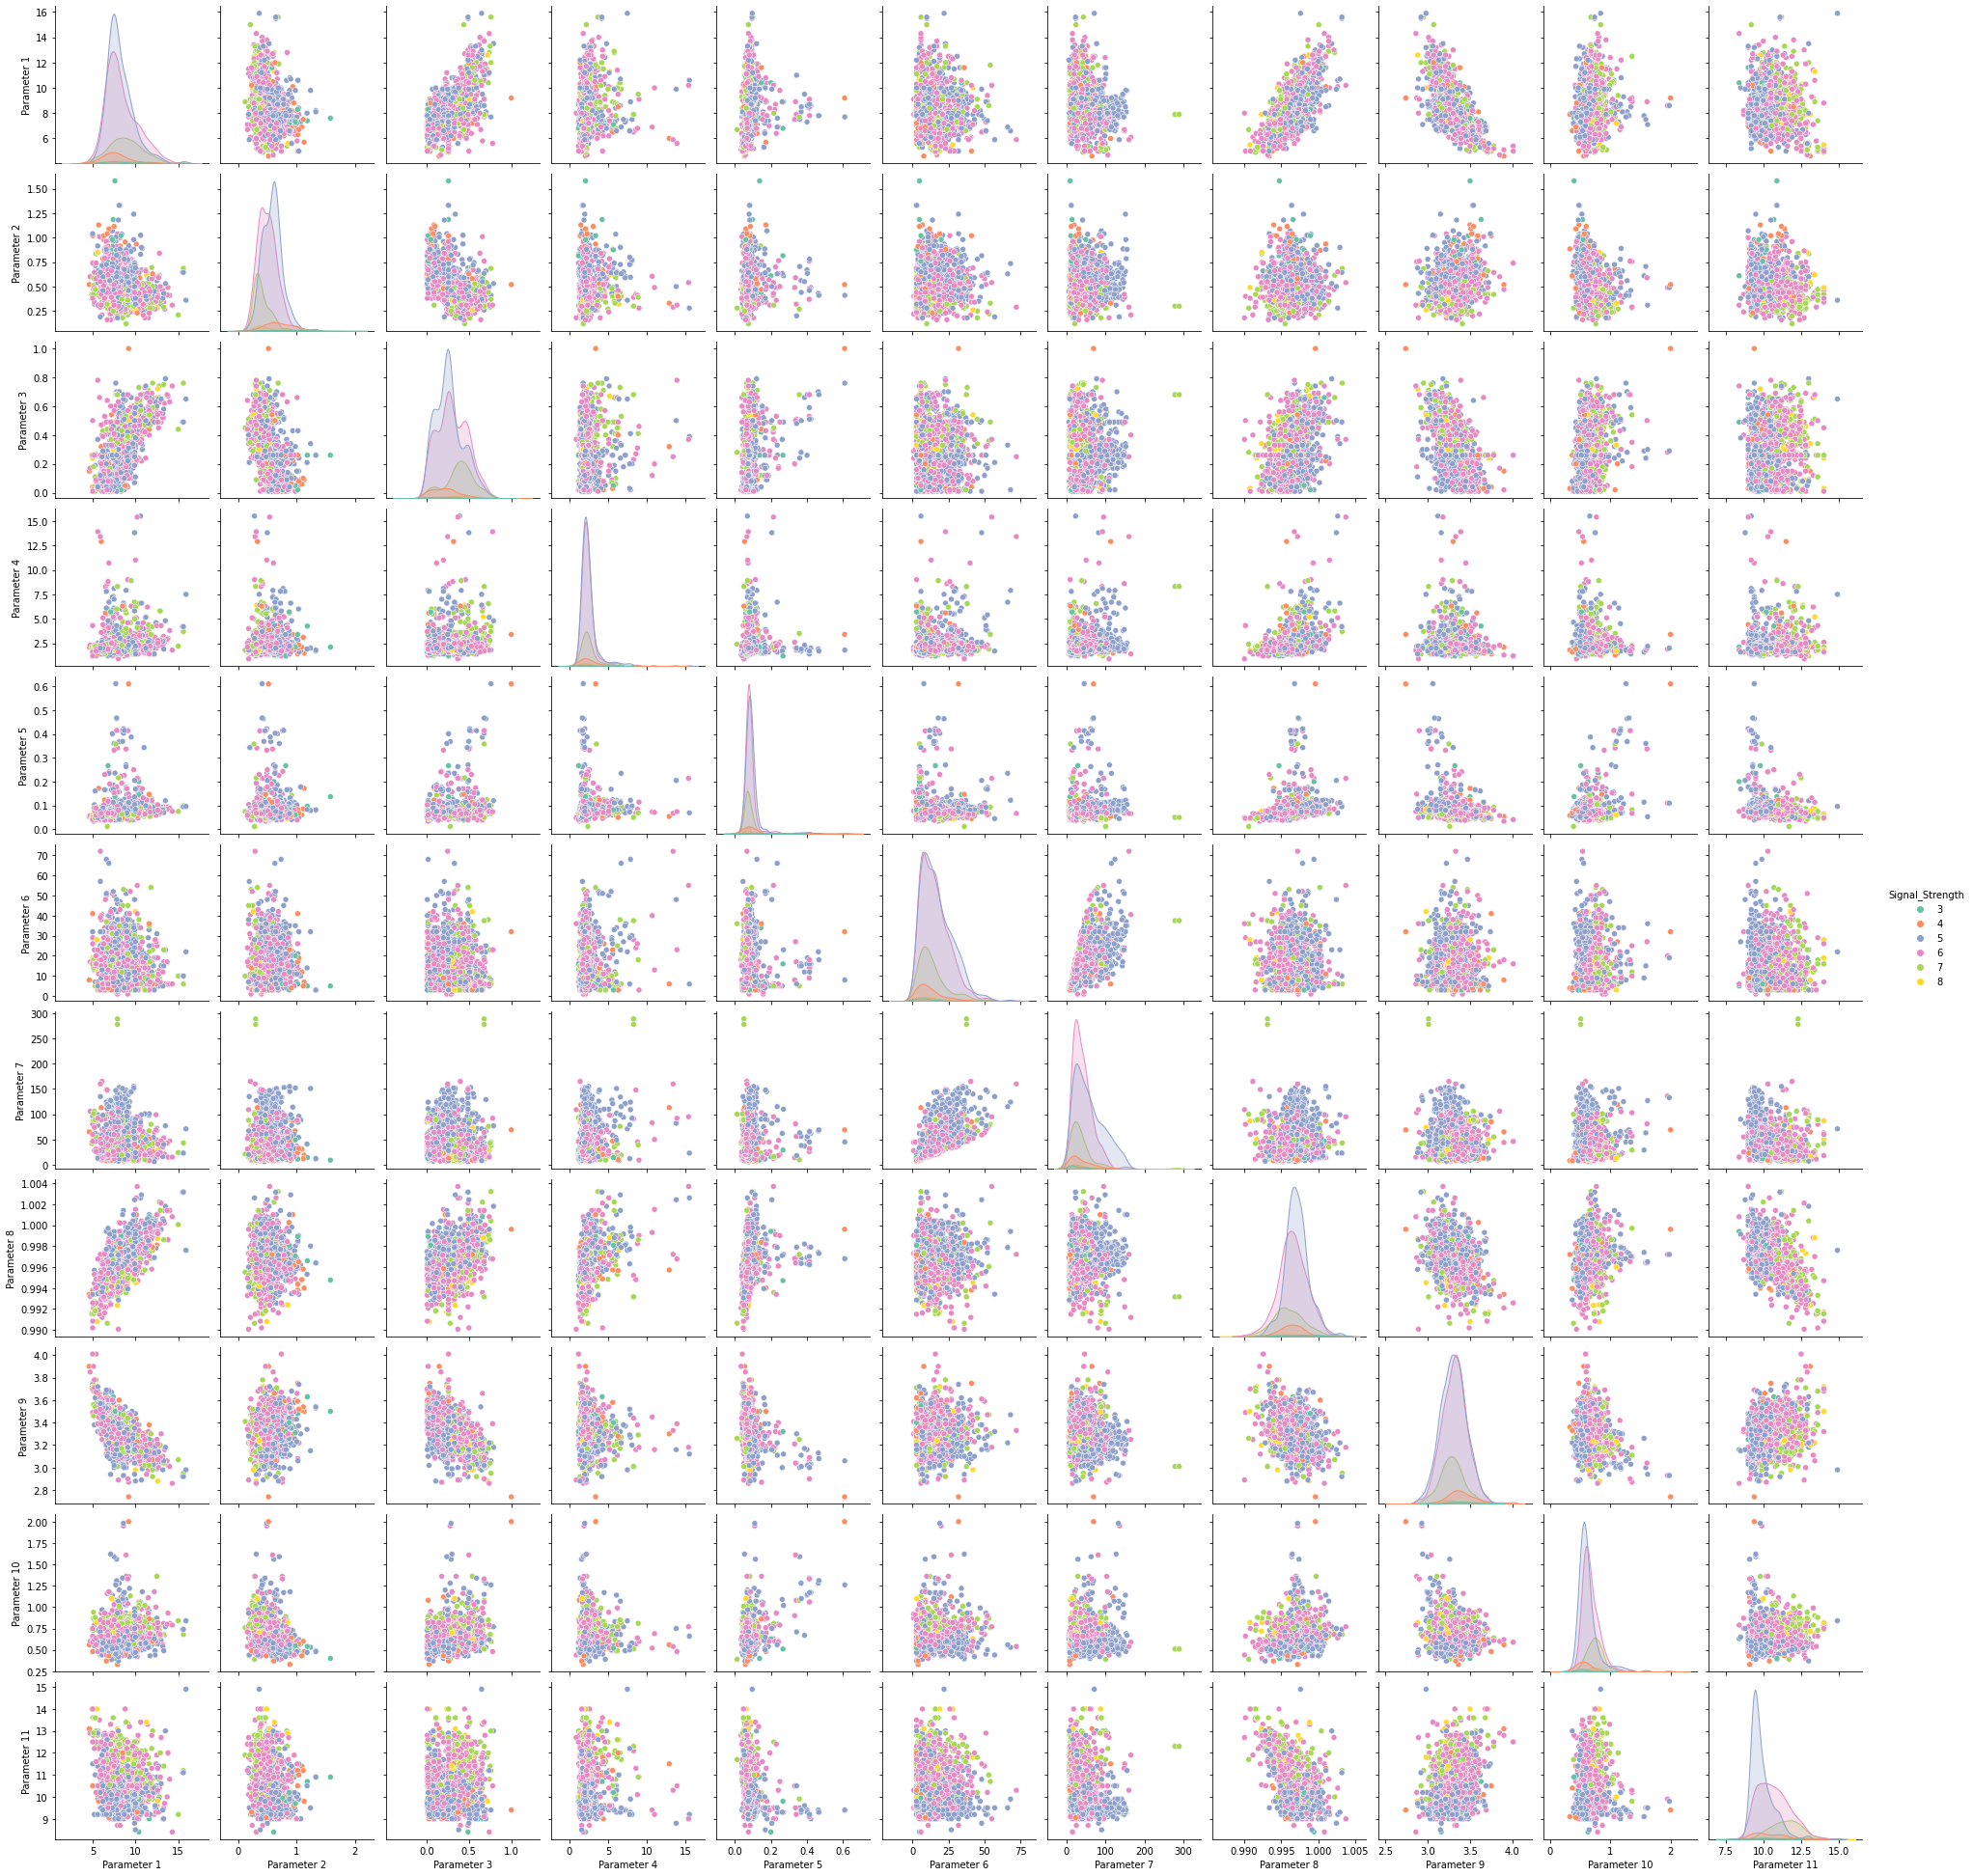

In [ ]:
sns.pairplot(dataset, hue="Signal_Strength", palette='Set2')

# 2. Data Preprocessing

2.A

In [ ]:
# Splitting data into X and Y

X= dataset.iloc[:, :11]
y= dataset.iloc[:, 11]

2.B

In [ ]:
# Spliting data into train and test 

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.30, random_state=2)

2.C

In [ ]:
# printing shape of all the 4 sets

print("Train set shape: ",train_X.shape)
print("Target train shape: ",train_y.shape)
print("Test set shape: ",test_X.shape)
print("Target test shape: ",test_y.shape)

Train set shape:  (951, 11)
Target train shape:  (951,)
Test set shape:  (408, 11)
Target test shape:  (408,)


2.D

 **Normalising data**

In [ ]:
# we check skewness of dataset

dataset.skew()

Parameter 1        0.941041
Parameter 2        0.729279
Parameter 3        0.354317
Parameter 4        4.548153
Parameter 5        5.502487
Parameter 6        1.226579
Parameter 7        1.540368
Parameter 8        0.044778
Parameter 9        0.232032
Parameter 10       2.406505
Parameter 11       0.859841
Signal_Strength    0.192407
dtype: float64

In [ ]:
# we use standardscaler to normalize our data
sc=StandardScaler()
train_X= sc.fit_transform(train_X)
test_X= sc.transform(test_X)


In [ ]:
type(test_X)

numpy.ndarray

In [ ]:
# Converting target variable  into categorical 
from keras.utils.np_utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
print("shape of train_y is: ", train_y.shape)
print("shape of test_y is: ", test_y.shape)

shape of train_y is:  (951, 9)
shape of test_y is:  (408, 9)


2.E

In [ ]:
# Transforming labels into format acceptable by Neural Networks

from tensorflow.keras.models import Sequential

# Initializing the ANN

classifier = Sequential()

from keras.layers import Dense

classifier.add(Dense(activation='relu',input_dim = 11, units =11, kernel_initializer='uniform'))

#Add 1st hidden layer
classifier.add(Dense(64, activation = 'relu', kernel_initializer='uniform'))

# ADD 2nd hidden layer
classifier.add(Dense(16, activation='relu', kernel_initializer='uniform'))

# Output Layer
classifier.add(Dense(9, activation='softmax', kernel_initializer='uniform')) 

3.A

In [ ]:

# Compile the model
classifier.compile(optimizer='adam', loss='mse' ,
                   metrics=['accuracy'])



In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 9)                 153       
                                                                 
Total params: 2,093
Trainable params: 2,093
Non-trainable params: 0
_________________________________________________________________


3.B:

In [ ]:
nn=classifier.fit(train_X, train_y,  
          epochs=100,batch_size=100, validation_data=(test_X, test_y), verbose=2
          )

Epoch 1/100
10/10 - 1s - loss: 0.0986 - accuracy: 0.3754 - val_loss: 0.0984 - val_accuracy: 0.4314 - 922ms/epoch - 92ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0983 - accuracy: 0.4217 - val_loss: 0.0980 - val_accuracy: 0.4314 - 62ms/epoch - 6ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0977 - accuracy: 0.4217 - val_loss: 0.0973 - val_accuracy: 0.4314 - 68ms/epoch - 7ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0968 - accuracy: 0.4217 - val_loss: 0.0961 - val_accuracy: 0.4314 - 54ms/epoch - 5ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0951 - accuracy: 0.4217 - val_loss: 0.0935 - val_accuracy: 0.4314 - 43ms/epoch - 4ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0914 - accuracy: 0.4217 - val_loss: 0.0880 - val_accuracy: 0.4314 - 42ms/epoch - 4ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0844 - accuracy: 0.4217 - val_loss: 0.0789 - val_accuracy: 0.4314 - 56ms/epoch - 6ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0756 - accuracy: 0.4217 - val_loss: 0.0719 - val_accuracy: 0.4314 - 55ms/epoch - 6ms/step
Epoch 9/100
10

3.C:

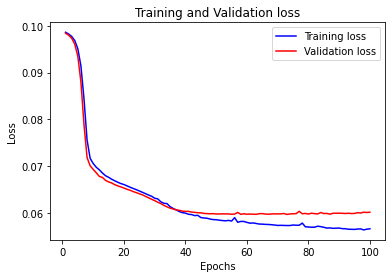

In [ ]:
# Plotting visuals 

train_loss = nn.history['loss']
validation_loss = nn.history['val_loss']
epoch = range(1,101)
plt.plot(epoch, train_loss, 'b', label='Training loss')
plt.plot(epoch, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

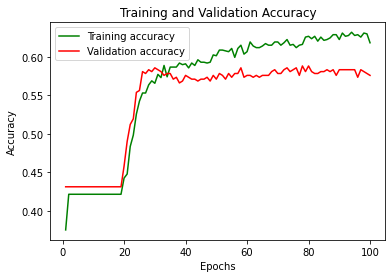

In [ ]:
accuracy = nn.history['accuracy']
validation_accuracy = nn.history['val_accuracy']
epoch = range(1,101)
plt.plot(epoch, accuracy, 'g', label='Training accuracy')
plt.plot(epoch, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3.D

In [ ]:
#Updating classifier to improve performance

nn_classifier= Sequential()

# The Input Layer
nn_classifier.add(Dense(256, kernel_initializer='normal',input_dim = 11, activation='relu'))

# Hidden Layers

nn_classifier.add(Dense(128, kernel_initializer='normal',activation='relu'))  

nn_classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))
nn_classifier.add(LeakyReLU(alpha=0.1))

nn_classifier.add(Dense(32, kernel_initializer='normal',activation='relu'))
nn_classifier.add(LeakyReLU(alpha=0.1))

nn_classifier.add(Dense(16, kernel_initializer='normal',activation='relu'))
nn_classifier.add(LeakyReLU(alpha=0.1))

# The Output Layer

nn_classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))


In [ ]:
# compiling the network layers

nn_classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
nn_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               3072      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [ ]:
nn_new=nn_classifier.fit(train_X, train_y,  
          epochs=100,batch_size=100, validation_data=(test_X, test_y), verbose=2
          )

Epoch 1/100
10/10 - 1s - loss: 0.1973 - accuracy: 0.3975 - val_loss: 0.1971 - val_accuracy: 0.3848 - 729ms/epoch - 73ms/step
Epoch 2/100
10/10 - 0s - loss: 0.1966 - accuracy: 0.3975 - val_loss: 0.1954 - val_accuracy: 0.3848 - 57ms/epoch - 6ms/step
Epoch 3/100
10/10 - 0s - loss: 0.1918 - accuracy: 0.3975 - val_loss: 0.1795 - val_accuracy: 0.3848 - 57ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 0.1570 - accuracy: 0.3975 - val_loss: 0.1369 - val_accuracy: 0.3848 - 70ms/epoch - 7ms/step
Epoch 5/100
10/10 - 0s - loss: 0.1339 - accuracy: 0.3975 - val_loss: 0.1366 - val_accuracy: 0.3848 - 70ms/epoch - 7ms/step
Epoch 6/100
10/10 - 0s - loss: 0.1339 - accuracy: 0.3975 - val_loss: 0.1366 - val_accuracy: 0.3848 - 69ms/epoch - 7ms/step
Epoch 7/100
10/10 - 0s - loss: 0.1339 - accuracy: 0.3975 - val_loss: 0.1366 - val_accuracy: 0.3848 - 77ms/epoch - 8ms/step
Epoch 8/100
10/10 - 0s - loss: 0.1339 - accuracy: 0.3975 - val_loss: 0.1366 - val_accuracy: 0.3848 - 71ms/epoch - 7ms/step
Epoch 9/100
10

3.E

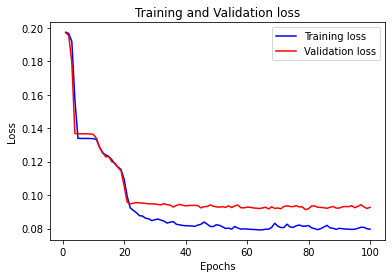

In [ ]:
# Plotting visuals 

train_loss = nn_new.history['loss']
validation_loss = nn_new.history['val_loss']
epoch = range(1,101)
plt.plot(epoch, train_loss, 'b', label='Training loss')
plt.plot(epoch, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

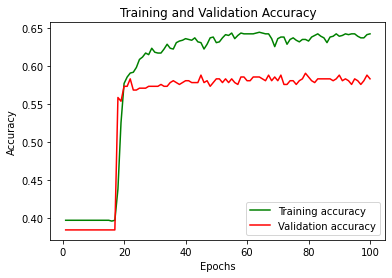

In [ ]:
accuracy = nn_new.history['accuracy']
validation_accuracy = nn_new.history['val_accuracy']
epoch = range(1,101)
plt.plot(epoch, accuracy, 'g', label='Training accuracy')
plt.plot(epoch, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Insights:

1. Earlier model (nn) has simple model configuration with one hidden layer as compared to second model (nn_classifier) which is using multiple hidden layers.'
2. Accuracy has improved and is stable in second model whereas
   losses have increased in model with multiple hidden layers.


# PART B

**DOMAIN**: Autonomous Vehicles

**CONTEXT**: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

**DATA DESCRIPTION**: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

**PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.

In [ ]:
import h5py
import numpy as np

1.A

In [ ]:
import h5py

# Open the file as readonly
h5_file= h5py.File("/content/gdrive/MyDrive/Colab Notebooks/ANN Project/Autonomous_Vehicles_SVHN_single_grey1.h5")

1.B

In [ ]:
h5_file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

1.C

In [ ]:
# splitting data into train, test and validation set
X1_train = h5_file['X_train'][:]
Y1_train = h5_file['y_train'][:]
X1_val = h5_file['X_val'][:]
Y1_val = h5_file['y_val'][:]
X1_test = h5_file['X_test'][:]
Y1_test = h5_file['y_test'][:]

Data Visualization and Preprocessing

In [ ]:
import numpy as np

from keras.models import Sequential

In [ ]:
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
# fix random seed for reproducability 
seed = 7
np.random.seed(seed)

2.A

In [ ]:
# printing shape of datatypes 
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


2.B

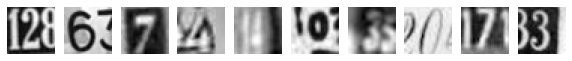

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in dataset and its labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X1_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y1_train[0:10]))


2.C

In [ ]:
# reshaping data 

X1_train= X1_train.reshape(X1_train.shape[0],1024)
X1_test = X1_test.reshape(X1_test.shape[0],1024)

2.D

In [ ]:
#normalize inputs from 0-255 to 0-1
X1_train= X1_train/255.0
X1_test =X1_test/255.0

# printing new shape of train and test datas
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(42000, 1024)
(18000, 1024)
(42000,)
(18000,)


2.E

In [ ]:
# transforming labels into format accepted by Neural Network

from tensorflow.keras.utils import to_categorical
# one hot encode outputs
Y1_train = to_categorical(Y1_train)
Y1_test = to_categorical(Y1_test)

In [ ]:
Y1_train.shape

(42000, 10)

2.F

In [ ]:
number_of_classes= Y1_train.shape[1]
print("Number of classes in this dataset are: ", number_of_classes )

Number of classes in this dataset are:  10


# Model Training

3.A

In [59]:
# creating model 
model_nn = Sequential()  

model_nn.add(Flatten())
# layers 
model_nn.add(Dense(256, activation='relu')) 
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))

# output layer
model_nn.add(Dense(10, activation='softmax'))

3.B

In [60]:
# Building model & compiling model
from tensorflow.keras import optimizers

sgd=optimizers.Adam(learning_rate=0.001)
model_nn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 


3.C

In [61]:
# fitting the model
model_history = model_nn.fit(X1_train, Y1_train, validation_data=(X1_test, Y1_test), epochs=100, batch_size=100, verbose=2)

Epoch 1/100
420/420 - 3s - loss: 2.2977 - accuracy: 0.1049 - val_loss: 2.2507 - val_accuracy: 0.1423 - 3s/epoch - 7ms/step
Epoch 2/100
420/420 - 2s - loss: 2.0675 - accuracy: 0.2280 - val_loss: 1.8565 - val_accuracy: 0.3334 - 2s/epoch - 5ms/step
Epoch 3/100
420/420 - 2s - loss: 1.5778 - accuracy: 0.4715 - val_loss: 1.4040 - val_accuracy: 0.5378 - 2s/epoch - 5ms/step
Epoch 4/100
420/420 - 2s - loss: 1.3242 - accuracy: 0.5695 - val_loss: 1.2409 - val_accuracy: 0.6104 - 2s/epoch - 5ms/step
Epoch 5/100
420/420 - 2s - loss: 1.2166 - accuracy: 0.6129 - val_loss: 1.2228 - val_accuracy: 0.6116 - 2s/epoch - 5ms/step
Epoch 6/100
420/420 - 2s - loss: 1.1516 - accuracy: 0.6372 - val_loss: 1.1471 - val_accuracy: 0.6390 - 2s/epoch - 6ms/step
Epoch 7/100
420/420 - 2s - loss: 1.1027 - accuracy: 0.6550 - val_loss: 1.0650 - val_accuracy: 0.6728 - 2s/epoch - 6ms/step
Epoch 8/100
420/420 - 2s - loss: 1.0531 - accuracy: 0.6723 - val_loss: 1.0197 - val_accuracy: 0.6864 - 2s/epoch - 5ms/step
Epoch 9/100
420/

3.D

Text(0.5, 1.0, 'Training and validation loss')

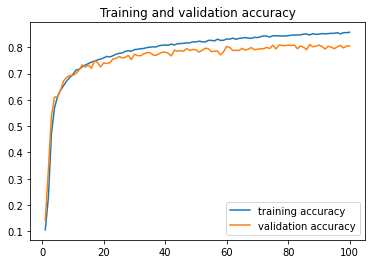

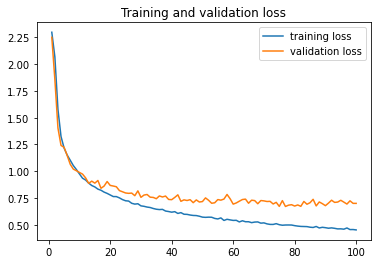

In [62]:
epochs = range(1,101)

# assigning values to variables

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# Ploting curves

plt.plot( epochs, accuracy, label = 'training accuracy' )
plt.plot( epochs, val_accuracy, label = 'validation accuracy' )
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )

plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

#Observations:

1. Model is slightly overfitted.
2. validation loss is greater than training loss
3. Training accuracy = 0.85 and Validation accuracy = 0.80     achieved after 100 epochs